# ! Prerequisites for ```binder``` execution

If you are runnning on ```binder``` you will be needing to install following python packages to excute data processing:

```numpy pandas matplotlib```

Therefore, be sure to execute the following cell every time you start a new ```binder``` session.

In [ ]:
import sys
import subprocess

# Run pip install quietly
subprocess.run(
    [sys.executable, "-m", "pip", "install", "numpy", "pandas", "matplotlib", "scipy"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL,
    check=True
)

print("Prerequisites installed successfully. Go on for data process.")

# ! Before you start the analysis. Make sure your data is downloaded. 

# Analysis of cosmic ray data

In this note book we perform analysis of cosmic ray data taken from scintillator, using ```python```.

A convenient python package ```cosmicray``` is provided, which contains very useful functions for this analysis.

We also need to use ```pandas``` to deal with ```.csv``` data.

In [1]:
import cosmicray as cr
import pandas as pd

## Waveform and signal timing check

First things first, we need to look at the data we have taken and try to derive the signal timing.

The data taken from the telescope is binary ```.isf``` data, which needs to be decoded and interpreted into understandable data. Such decoding can be performed using the function provided by ```cosmicray``` module.

### Usage of decoding function

Decoding function provided is:

```
decode_isf_to_csv(isf_filename: str,TIME_OFFSET: float, ratio_time = True, ratio_threshold = 0.5, V_threshold = -0.05, ...)
```

We input the filename of ```.isf``` file and ```TIME_OFFSET``` to decode the data.

After decoding, this function will find the signal timing according to the threshold setting.

When ```ratio_time``` is ```True```, the signal timing is determied by the ratio of signal peak, where the ratio is specified with ```ratio_threshold```.

When ```ratio_time``` is ```False```, the signal timing is determied by an absolute voltage value, where the voltage is specified with ```V_threshold```.

Then, it will save the interpreted data into a ```.csv``` file.

This function returns 4 result: ```vmin, signal_timing, saturation, str(csv_path)```. The saturation is a number indicating if the signal is saturated (larger than 32700) or not.

The 

Example usage:

In [2]:
TIME_OFFSET = 950 # this value is actually not so important.

# decode the data using decode function provided by cosmicray (cr) module.
vmin, fwhm, saturation, csv = cr.decode_isf_to_csv(f"../data/test/wfmdata/run00010_1.isf", TIME_OFFSET, ratio_time=True, ratio_threshold=0.5)
print(f"Signal waveform peak: {vmin} V, signal timing: {fwhm} ns, Saturation?: {saturation}, csv file saved at: {csv}")

# check the csv file using pandas
df_first_check=pd.read_csv(csv)
df_first_check.head() # show first 5 rows

Signal waveform peak: -0.20886962500000006 V, signal timing: 43.713279854809485 ns, Saturation?: 0, csv file saved at: ../data/test/wfmdata/run00010_1.csv


,time_ns,voltage_V
0,-950.0,-0.008495
1,-949.8,-0.012338
2,-949.6,-0.004651
3,-949.4,-0.009026
4,-949.2,-0.004776


### Usage of plotting function

Plotting function is provided by ```cosmicray``` module:

``` plot_waveforms_csv(csv_files, xlim=None, plot_time=True, ratio_time=True, ratio_threshold=0.5, V_threshold=-0.05, ...)```

This function accepts a **list** of csv files (```[csv1, csv2, ...]```) and it plots the waveforms saved in the csv files.

The x range can be specified by ```xlime = (x_low, x_up)```. 

If ```plot_time=True```, it will also plot the signal time indicator, according to the signal timing setting using ```ratio_time, ratio_threshold, V_threshold```.

Example usage:

run00010_1: vmin=-0.2089 V, threshold=-0.1044 V, timing=43.713 ns


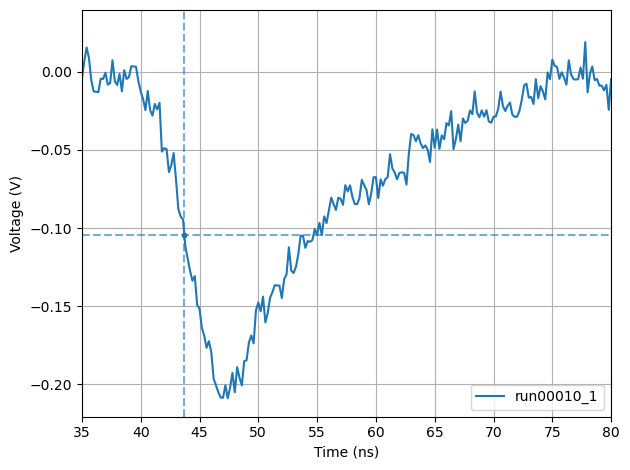

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Time (ns)', ylabel='Voltage (V)'>)

In [3]:
cr.plot_waveforms_csv([csv], xlim=(35,80), plot_time=True, ratio_time=True, ratio_threshold=0.5)

## Exercise 1

In this experiment, we have 4 PMT waveforms recorded for each cosmic ray signal.

Each cosmic ray trigger is counted as ```run00000, run00001, ...``` and each PMT channel is noted as ```run00000_1, run00000_2, ...```.

Please pick several cosmic ray trigger, decode the waveform data and plot it for all 4 channels.

wave form amplitudes for channle 1, 2, 3, 4 (V): [-0.20886962500000006, -0.16356550000000006, -0.35943087500000004, -0.32816209375000005]
fwhm timing for channle 1, 2, 3, 4 (ns): [43.713279854809485, 49.65321558441562, 45.92460645161293, 49.811888768116006]
run00010_1: vmin=-0.2089 V, threshold=-0.1044 V, timing=43.713 ns
run00010_2: vmin=-0.1636 V, threshold=-0.08178 V, timing=49.653 ns
run00010_3: vmin=-0.3594 V, threshold=-0.1797 V, timing=45.925 ns
run00010_4: vmin=-0.3282 V, threshold=-0.1641 V, timing=49.812 ns


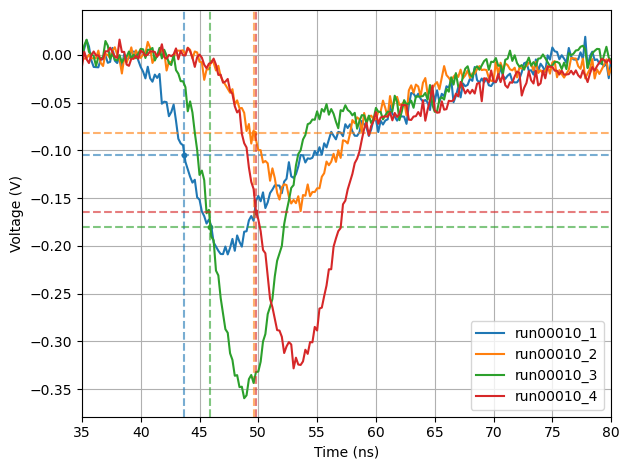

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Time (ns)', ylabel='Voltage (V)'>)

In [4]:
# Write your exercise 1 in this cell and excute.
# You can increase the number of cells if needed.

vmins = [] # V
fwhms = []
saturations = []
csvs = []
TIME_OFFSET = 950 # ns

for i in range(4):
    vmin, fwhm, saturation, csv = cr.decode_isf_to_csv(f"../data/test/wfmdata/run00010_{i+1}.isf", TIME_OFFSET, ratio_time=True, ratio_threshold=0.5)
    vmins.append(vmin)
    fwhms.append(fwhm)
    saturations.append(saturation)
    csvs.append(csv)

    if saturation == 1:
        print("saturation?")

print(f"wave form amplitudes for channle 1, 2, 3, 4 (V): {vmins}")
print(f"fwhm timing for channle 1, 2, 3, 4 (ns): {fwhms}")
cr.plot_waveforms_csv(csvs,xlim=(35,80), plot_time=True, ratio_time=True, ratio_threshold=0.5)


## Massive data process

Since we took hundreds of data triggers, it is impossible to decode and check them one by one. 

```cosmicray``` module provides a convenient function to process a large number of triggered data, where each trigger has data of 4 PMT channels.

### Usage of process function

Massive data process function provided in the module is:

```def process_data(dir_data: str, n_measurements: int, TIME_OFFSET: float, summary_name: str = "summary.csv", ...)```

```dir_data`` accepts the directory name where the data is saved.

```n_measurement``` accepts the number of measurements/triggers. 

It will generate a summary csv file under the data directory, whose file name is specified using ```summary_name```.

Of course it also accepts the signal timing setting using ```ratio_time, ratio_threshold, V_threshold```.

! no example use.

## Exercise 2

Please process all the measurement data using procided function.

After processing, check the summary csv file using ```pandas```.

If you find one measurement has data with saturation, it means that measurement of cosmic ray is not proper. You can drop off the sarurated measurement using ```df.drop(index = [i, j, ...])``` where ```i, j, ...``` are the indexes of the saturated measurement.

In [7]:
# Write your exercise 2 in this cell and excute.
# You can increase the number of cells if needed.

dir_data = "../data/test/wfmdata/"
n_measurements = 308
TIME_OFFSET = 950 # ns

summary_csv = cr.process_data(dir_data, n_measurements, TIME_OFFSET, summary_name="summary.csv", ratio_time=True, ratio_threshold=0.5, V_threshold=-0.05)

df_summary = pd.read_csv(summary_csv)
df_summary.head() # show first 5 rows of summary

[run 00003 ch 1] saturation?
Summary saved to: ../data/test/wfmdata/summary.csv


,measurement,v1,v2,v3,v4,t1,t2,t3,t4,ct1,ct2,ct3,ct4,csv1,csv2,csv3,csv4
0,0,-0.197941,-0.410812,-0.142833,-0.227189,47.867592,47.003744,48.858456,48.717890,47.867592,47.003744,48.858456,48.717890,../data/test/wfmdata/run00000_1.csv,../data/test/wfmdata/run00000_2.csv,../data/test/wfmdata/run00000_3.csv,../data/test/wfmdata/run00000_4.csv
1,1,-0.105826,-0.078271,-0.114533,-0.310335,42.404868,48.224733,47.236309,41.751337,42.404868,48.224733,47.236309,41.751337,../data/test/wfmdata/run00001_1.csv,../data/test/wfmdata/run00001_2.csv,../data/test/wfmdata/run00001_3.csv,../data/test/wfmdata/run00001_4.csv
2,2,-0.148032,-0.296571,-0.140872,-0.210409,48.282483,46.190467,48.751827,49.761823,48.282483,46.190467,48.751827,49.761823,../data/test/wfmdata/run00002_1.csv,../data/test/wfmdata/run00002_2.csv,../data/test/wfmdata/run00002_3.csv,../data/test/wfmdata/run00002_4.csv
3,3,-0.381747,-0.537700,-0.248853,-0.378254,49.429079,29.406053,72.821820,70.139946,49.429079,29.406053,72.821820,70.139946,../data/test/wfmdata/run00003_1.csv,../data/test/wfmdata/run00003_2.csv,../data/test/wfmdata/run00003_3.csv,../data/test/wfmdata/run00003_4.csv
4,4,-0.231639,-0.155795,-0.199652,-0.229773,43.009108,49.310656,46.581831,49.147325,43.009108,49.310656,46.581831,49.147325,../data/test/wfmdata/run00004_1.csv,../data/test/wfmdata/run00004_2.csv,../data/test/wfmdata/run00004_3.csv,../data/test/wfmdata/run00004_4.csv


In [8]:
df_summary = df_summary.drop(index=[3])

## Time of flight calculation

In the summary csv file generated from the massive processing, we have the signal timing of all PMT channels of every measurement.

Next, we can calculate the **time of flight** of the cosmic ray using the signal timing of PMT channels:

$$
t_{TOF} = \frac{(t_3+t_4)-(t_1+t_2)}{2}
$$

We can do this calculation easily using ```pandas``` dataframe.

Example:

```tof = (df["t3"] + df["t4"] - df["t1"] - df["t2"]) / 2```

The resulted ```tof``` will be a series of calculated time of flight.

## Exercise 3

Calculate the time of flight using the summary produced before and check the calculated ```tof```.


In [ ]:
# Write your exercise 3 in this cell and excute.
# You can increase the number of cells if needed.

tof = (df_summary["t3"] + df_summary["t4"] - df_summary["t1"] - df_summary["t2"]) / 2
tof.head()

0    1.352505
1   -0.820977
2    2.020350
4    1.704696
5    1.156522
dtype: float64

## Histogram and fitting of TOF

The most usual way to check the result of multiple measurements is filling the result into a histogram.

For resonable measurements of the same object, the result should form a peak around a certain value. 

Then, we pefrom a gaussian fit to the histogram to get the mean value.

The plotting of histogram and gaussian fit can be done by a function provided in the ```cosmicray``` module.

### Usage of fitting function

Histogram and gaussian fit function provided in  the ```cosmicray``` module is:

```def plot_hist_gaussfit( tof, bins=100, plt_range= (low, up), xlabel="TOF [ns]", title="TOF distribution")```

The first argument accepts the produced pandas series before.

You can also change the number of bins and range of plot by other settings.

This function returns the fitting result ```(mean, sigma)```.

## Exercise 4

Plot the histogram of the calculated time of flight and perform gaussian fitting for it.

If you want, you can directly calculate the speed of cosmicray in the code using the fitting result.

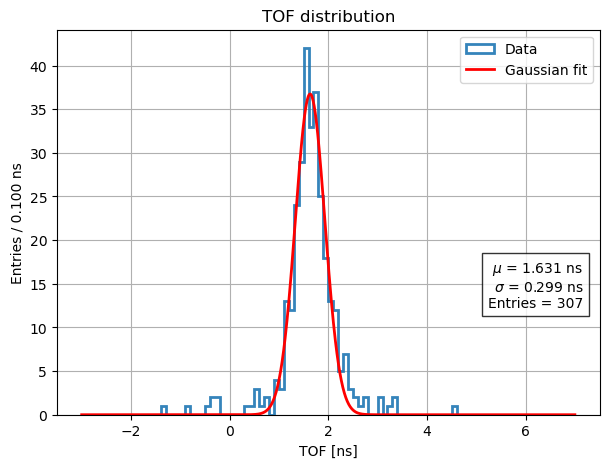

Fit result:
Mean  = 1.631456 ns
Sigma = 0.299225 ns


In [ ]:
# Write your exercise 4 in this cell and excute.
# You can increase the number of cells if needed.

u, s = cr.plot_hist_gaussfit(tof, bins=100, plt_range=(-3,7))

# v = l/u.

---

---

# CHECK AND DISCUSS ABOUT YOUT RESULT BEFORE MOVING ON

1. What is the measured cosmic ray speed?

2. What is the uncertainty?

3. Does the result look correct?

---

---

# Calibration of PMT channels

As you learned from the lecture, we need to perform the calibration to get a more reasonable result.

Basically the idea is to measure the time difference of PMT channel 2, 3, 4 with respect to channel 1, using the calibration data (not the time of flight data).

## Time difference measurement

Using the same functions which are used to process time of flight data, we can measure time difference based on calibration data:

$$
t_{calib. 2} = t_2 - t_1 \\
t_{calib. 3} = t_3 - t_1 \\
t_{calib. 3} = t_4 - t_1
$$

## Exercise 5

Since we have calibration data now, please do the following using what you have learned:

1. (if you want) you can check the plot of waveforms of several measurements in the calibration data, as you did for time of flight data.

2. Process all the calibration data.

3. Plot histograms and do gaussian fitting for $t_{calib. 1}, t_{calib. 2}, t_{calib. 3}$.

In [ ]:
# Write your exercise 5 in this cell and excute.
# You can increase the number of cells if needed.

# hint 1: when do massive data processing, the calibration data and time of flight data have to be put in different folders.
# hint 2: be careful about the variable name of the data frame, variable name of the data directory, file name of the csv files and so on...



## Apply calibration

Now we have measured the timing difference of PMT channel 2, 3, 4 with respect to channel 1.

Looking back to the time of flight data we took originally, when calculating time of flight, we need to cancel the time difference for each channel manually.

Such calibration application can be done by the massive processing function ```process_data```.

### Usage of calibration argument

The ```process_data``` accepts an argument ```calibrations = [-tcalib1, -tcalib2, -tcalib3, -tcalib4] ```. 

After inputing ```calibrations``` argument, it will apply calibration to the signal timing of each PMT channel. The output timings after calibration in the summary csv file are ```ct1, ct2, ct3, ct4```.


## Exercise 6

We have calculated the time difference of each channel, please do the following using what you have learned:

1. Apply calibration and re-process the **time of flight data**.

2. Calculate the tof using calibrated signal timing.

3. Plot the histogram of the calibrated tof and do gaussian fitting.

4. Calculate the result of cosmic ray speed.

In [12]:
# Write your exercise 6 in this cell and excute.
# You can increase the number of cells if needed.

# hint 1: again, be careful about the data directory, variable names, csv file names and so on.

# CHECK AND DISCUSS ABOUT YOUT RESULT

1. What is the measured cosmic ray speed?

2. What is the uncertainty?

3. Does the result look correct?

# Extra open topic: analysis tool development

In real frontier science, not all tools are prepared. Sometimes you need to develop what you need on your own. It would be a good experience to develop certain analysis tools for a certain science topic. For example, the development of ```cosmicray``` module. 

If you are good at programming and passionate about such development, it would be great to develop your own ```cosmicray_custom``` module and implement new features as you like.

## Exercise 0

The ```cosmicray_custom``` module is prepared in ```cosmicray_custom.py```. This module is not fully functional. Please complete the following feature:

1. Threshold calculation using settings of ```ratio_time, ratio_threshold, V_threshold```, in both ```decode_isf_to_csv``` and ```plot_waveforms_csv``` functions.

2. Calibration calculating using the argument ```calibrations``` in function ```process_data```. 

You can find the places of these implementations by searching for ```Exercise 0``` in the python file. 

Also, if you have some good idea, you can implement other features as you like. For example, you can define other functions or modify the existing functions.

After you complete your modification, import your ```cosmicray_custom``` module and test its functionality using the data we have:

1. data decoding.

2. waveform checking.

3. data processing.

4. plotting and fitting.

In [ ]:
# exercise 0
# After you complete cosmicray_custom.py, you can import cosmicray_custom module.

# hint: be careful about the module name and function name.